# Capstone Project - Car accident severity (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find the severity of an accident. This report targets stakeholders like the common people, police department, health department, insurance agencies etc. 

Since, the accidents have been increasing lately, it is important to identify the severity level for each accident that occured in the past and use this information to **identify the severity of accidents that occur based on various factors that describe the accident, damage to property, no of casualties, severity of the injuries etc.** This information can help the police and public departments to warn the public of the severity of accidents that are likely to accur in a **particular area or based on the weather conditions**.

We can use data science techniques and build machine learning models to predict the severity of accidents based on these factors.

## Data <a name="data"></a>

I have used the Data-Collisions.csv sample dataset downloaded from Coursera. The dataset contains data which describes the severity of the accident and the factors that are used to  determine the severity factor for Seattle. 

Based on definition of our problem, factors that will influence our decission are:
* Number of passengers, vehicles, cyclers involved in the accident
* The type of location and junction
* The type of collision
* Whether or not collision was due to inattention, speeding or influence of alcohol
* The condition of weather, road and surrounding lighting
* Whether or not the collision involved hitting a parked car

Other information which may not contribute to the prediction of accident severity was not considered for the analysis. 

Selecting only the above mention columns are part of the Data Cleaning process.

## Methodology


### Notebook imports

In [2]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [3]:
data = pd.read_csv("Data-Collisions.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Pre-Processing

### Selecting Attributes

In [38]:
accident_data = data[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','SPEEDING',
                      'VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','INATTENTIONIND','HITPARKEDCAR',
                     'UNDERINFL']]

In [39]:
accident_data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

## Exploratory Analysis

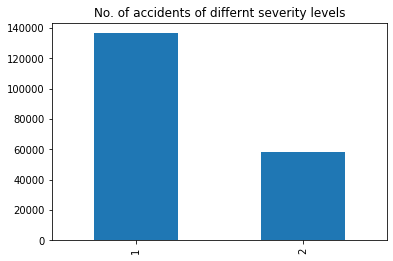

In [57]:
accident_data['SEVERITYCODE'].value_counts().plot(kind='bar',title='No. of accidents of differnt severity levels')

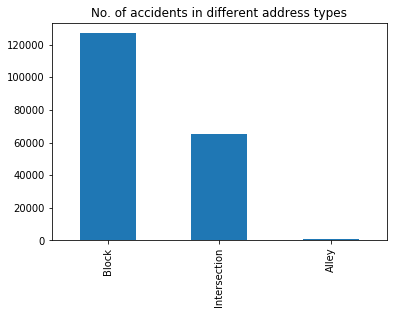

In [66]:
accident_data['ADDRTYPE'].value_counts().plot(kind='bar', title='No. of accidents in different address types')

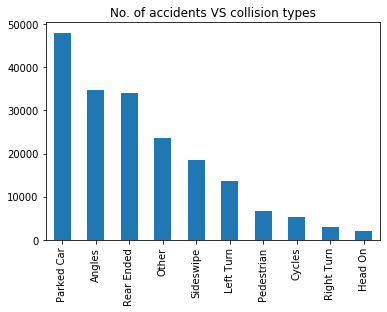

In [59]:
accident_data['COLLISIONTYPE'].value_counts().plot(kind='bar', title='No. of accidents VS collision types')

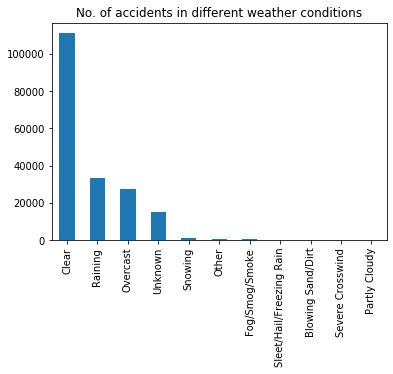

In [60]:
accident_data['WEATHER'].value_counts().plot(kind='bar',title='No. of accidents in different weather conditions')

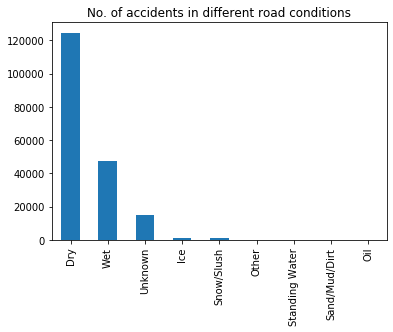

In [61]:
accident_data['ROADCOND'].value_counts().plot(kind='bar',title='No. of accidents in different road conditions')

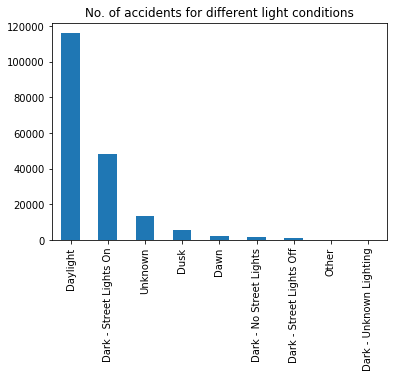

In [62]:
accident_data['LIGHTCOND'].value_counts().plot(kind='bar', title='No. of accidents for different light conditions')

### Split into features and labels

In [46]:
X = accident_data.drop(['SEVERITYCODE'],axis=1)
Y = accident_data['SEVERITYCODE']

### Label Encoder

In [47]:
le = LabelEncoder() 
#ohe= OneHotEncoder() 
X['ADDRTYPE']= le.fit_transform(X['ADDRTYPE'].astype(str))
X['COLLISIONTYPE']= le.fit_transform(X['COLLISIONTYPE'].astype(str))
X['JUNCTIONTYPE']= le.fit_transform(X['JUNCTIONTYPE'].astype(str))
X['INATTENTIONIND']= le.fit_transform(X['INATTENTIONIND'].astype(str))
X['UNDERINFL']= le.fit_transform(X['UNDERINFL'].astype(str))
X['WEATHER']= le.fit_transform(X['WEATHER'].astype(str))
X['ROADCOND']= le.fit_transform(X['ROADCOND'].astype(str))
X['LIGHTCOND']= le.fit_transform(X['LIGHTCOND'].astype(str))
X['HITPARKEDCAR']= le.fit_transform(X['HITPARKEDCAR'].astype(str))
X['SPEEDING']= le.fit_transform(X['SPEEDING'].astype(str))
Y = le.fit_transform(Y.astype(str))
X.dtypes

ADDRTYPE          int64
COLLISIONTYPE     int64
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
SPEEDING          int64
VEHCOUNT          int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
JUNCTIONTYPE      int64
INATTENTIONIND    int64
HITPARKEDCAR      int64
UNDERINFL         int64
dtype: object

In [48]:
X

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SPEEDING,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,INATTENTIONIND,HITPARKEDCAR,UNDERINFL
0,2,0,2,0,0,1,2,4,8,5,1,1,0,2
1,1,9,2,0,0,1,2,6,8,2,4,1,0,0
2,1,5,4,0,0,1,3,4,0,5,4,1,0,0
3,1,4,3,0,0,1,3,1,0,5,4,1,0,2
4,2,0,2,0,0,1,2,6,8,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,1,2,3,0,0,1,2,1,0,5,4,1,0,2
194669,1,7,2,0,0,1,2,6,8,5,4,0,0,2
194670,2,3,3,0,0,1,2,1,0,5,1,1,0,2
194671,2,1,2,0,1,1,1,1,0,6,1,1,0,2


In [49]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.28668708, -1.61169444, -0.33020207, -0.18743029, -0.16958841,
         0.22440165,  0.12553783,  0.22981187,  1.39847224,  0.25900713,
        -1.19903701,  0.42518348, -0.19619929,  0.70104229],
       [-0.69338623,  1.51276535, -0.33020207, -0.18743029, -0.16958841,
         0.22440165,  0.12553783,  0.87758556,  1.39847224, -1.36653782,
         0.73412368,  0.42518348, -0.19619929, -1.11995866],
       [-0.69338623,  0.12411655,  1.15576451, -0.18743029, -0.16958841,
         0.22440165,  1.7102107 ,  0.22981187, -0.73846749,  0.25900713,
         0.73412368,  0.42518348, -0.19619929, -1.11995866],
       [-0.69338623, -0.22304564,  0.41278122, -0.18743029, -0.16958841,
         0.22440165,  1.7102107 , -0.74184867, -0.73846749,  0.25900713,
         0.73412368,  0.42518348, -0.19619929,  0.70104229],
       [ 1.28668708, -1.61169444, -0.33020207, -0.18743029, -0.16958841,
         0.22440165,  0.12553783,  0.87758556,  1.39847224,  0.25900713,
        -1.19903701,  0.42

### Train test split

In [51]:
gc.collect()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

### Entropy based Decision Tree

In [68]:
dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 10, min_samples_leaf = 5) 
dt_entropy.fit(X_train, Y_train)
Y_pred = dt_entropy.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, Y_pred)) 
print ("Accuracy : ", accuracy_score(Y_test,Y_pred)*100) 

Confusion Matrix:  [[38651  2358]
 [11836  5557]]
Accuracy :  75.69603780692442


### Gini Index based Decision Tree

In [69]:
# Creating the classifier object 
dt_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=5) 
dt_gini.fit(X_train, Y_train)
Y_pred = dt_gini.predict(X_test)

print("Confusion Matrix: ", confusion_matrix(Y_test, Y_pred)) 
print ("Accuracy : ", accuracy_score(Y_test,Y_pred)*100) 

Confusion Matrix:  [[38683  2326]
 [11867  5526]]
Accuracy :  75.69775007705215
